In [1]:
%load_ext autoreload
%autoreload 2

from dlp.dataset import Dataset
from dlp.visualizer import Visualizer, SemanticVisualizer
from PIL import Image
from IPython.display import display
from pathlib import Path
import matplotlib.pyplot as plt

# Load dataset
ds = Dataset()
home_path = str(Path.home())
ds.load(home_path + '/dlp-dataset/data/DJI_0012')

# Pyplot Visualizer

In [2]:
# Instantiate the visualizer object
vis = Visualizer(ds)

## Plot scene

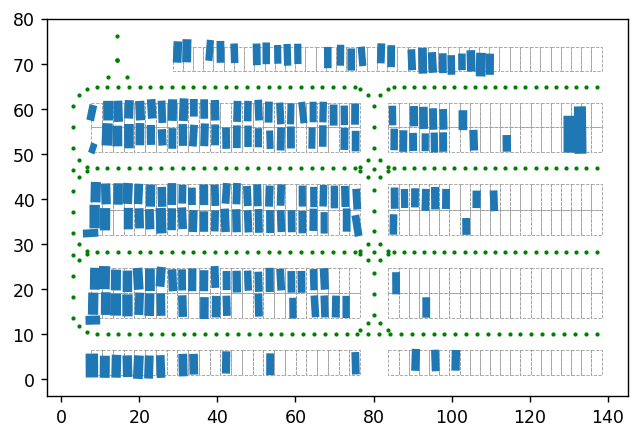

In [3]:
# Plot scene
ax = vis.plot_waypoints()
ax = vis.plot_scene(ds.list_scenes()[0], ax=ax)
plt.show()

## Plot the entire frame

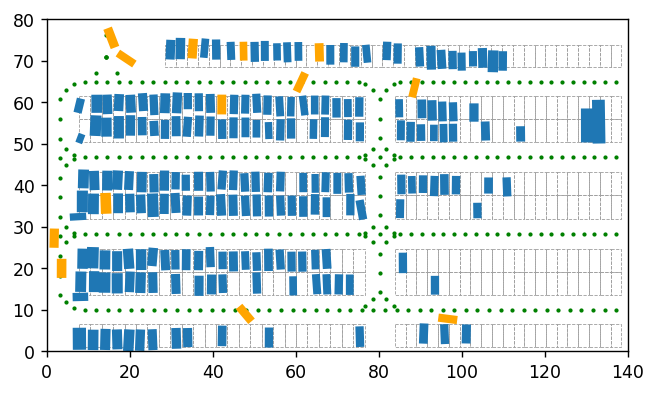

In [4]:
# Plot frame
scene = ds.get('scene', ds.list_scenes()[0])
ax = vis.plot_waypoints()
ax = vis.plot_frame(scene['first_frame'], ax=ax)
plt.show()

## Highlight the specified instance in this frame

The type of this instance is Car


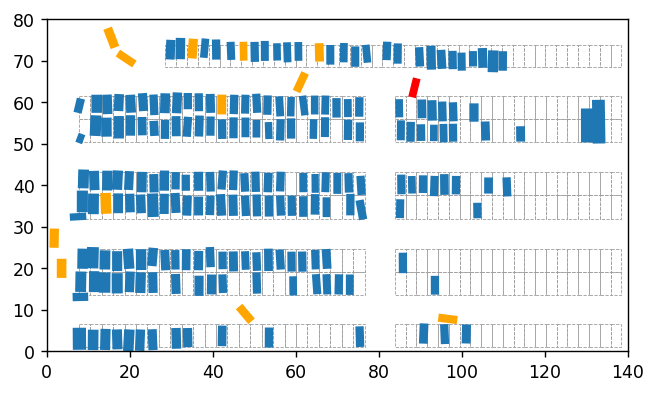

In [5]:
# Plot a certain instance
frame = ds.get('frame', scene['first_frame'])
ax = vis.highlight_instance(frame['instances'][0])
plt.show()

In [6]:
print(ds.get('instance', frame['instances'][0]))

{'instance_token': '0a72735ac3b5f6f50bfa50ad8e91ac3e40277854', 'agent_token': 'a1b3619e3bc68c3de29af54ba9ff3de96c7de3dc', 'frame_token': '840d7356e46973280c5e71d628fc3b240bfd040a', 'coords': [88.55000000004657, 63.47999999998137], 'heading': 1.328607346410207, 'speed': 0.23, 'acceleration': [0.0056, 0.0089], 'mode': '', 'prev': '', 'next': '2e40de975f5ec83c4831c54f8cb58275785a3ea8'}


# Semantic Visualizer

In [7]:
smt_vis = SemanticVisualizer(ds, steps=10)

## Plot the entire frame

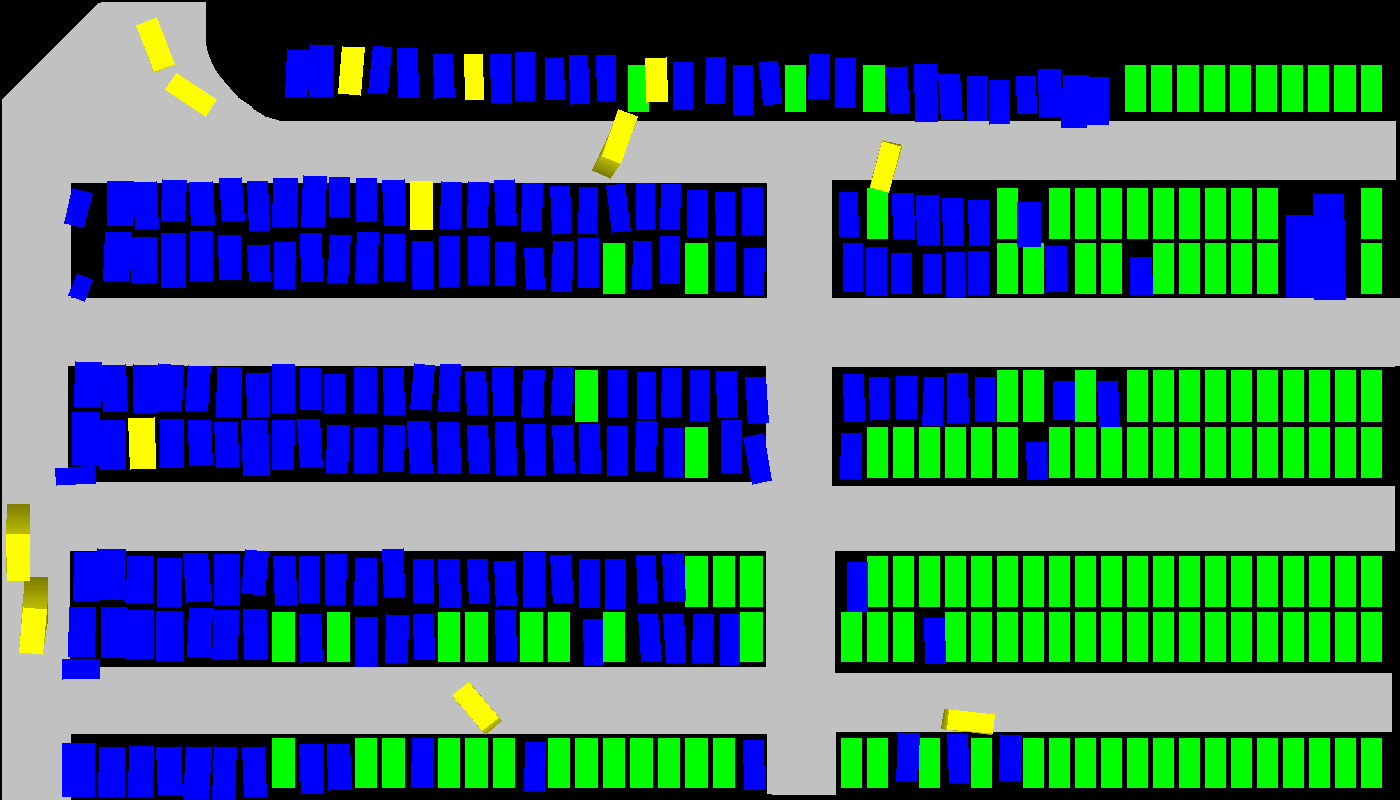

In [8]:
scene = ds.get('scene', ds.list_scenes()[0])
frame = ds.get_future_frames(scene['first_frame'],timesteps=50)[-1]
# frame = ds.get('frame', scene['first_frame'])
img_frame = smt_vis.plot_frame(frame['frame_token'])
display(img_frame.transpose(Image.FLIP_TOP_BOTTOM))

## Plot the instance-centric crop

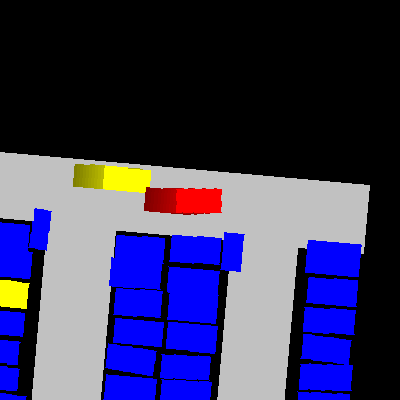

In [9]:
img = smt_vis.inst_centric(img_frame, frame['instances'][6])
display(img)

## Future trajectory

In [10]:
ds.get_future_traj(frame['instances'][6])

array([[ 3.27      , 16.9       , -1.65989265,  1.49      ],
       [ 3.26      , 16.84      , -1.66069265,  1.48      ],
       [ 3.26      , 16.78      , -1.66139265,  1.48      ],
       ...,
       [28.49      ,  3.08      , -1.55389265, -0.04      ],
       [28.49      ,  3.08      , -1.55379265, -0.04      ],
       [28.49      ,  3.08      , -1.55379265, -0.03      ]])